#### ЛАБОРАТОРНАЯ РАБОТА №1-2
<strong>Тема:</strong> Разработка программных модулей

<strong>Цель:</strong> Научиться разрабатывать простейшие модули программ.

In [186]:
import random as r
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
# %config InlineBackend.figure_formats = ['svg']


1) Даны координаты вершин многоугольника (х1,у1,х2,у2,х3,у3,…х10,у10).
Определить его периметр (вычисление расстояния между вершинами оформить
подпрограммой).

P = 112.29766109453267


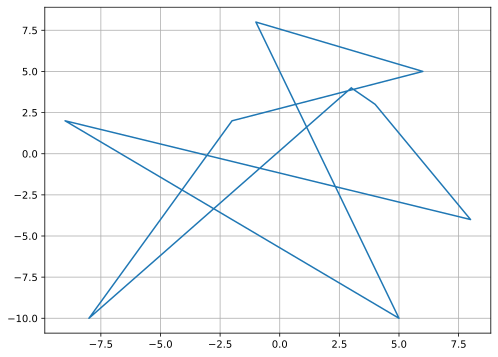

In [187]:
points = np.array([[r.randint(-10, 10), r.randint(-10, 10)] for _ in range(9)])
points = np.append(points, [points[0]], axis=0)

lines_size = [(abs(points[i-1][0] - points[i][0])**2 + abs(points[i-1][1] - points[i][1])**2)**(1/2) for i in range(len(points)) if i > 0]
p = sum(lines_size)
print(f'P = {p}')

#plot
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(points[:, 0], points[:, 1])
plt.grid(True)
plt.show()




2) Составить программу для вычисления суммы факториалов всех нечетных чисел
от1 до 9.

In [188]:
def get_f(num):
    if num == 0: return 1

    f = 1
    for n in range(1, num+1): f *= n
    return f

f_test = [get_f(num) for num in range(10) if num % 2 != 0]

print(f'Факториалы нечетных чисел от 1 до 9 {f_test}')


Факториалы нечетных чисел от 1 до 9 [1, 6, 120, 5040, 362880]


3) Составить программу для нахождения наименьшего общего кратного двух
натуральных чисел

##### $НОК(A,B) = \frac{A\cdot B}{НОД(A,B)}$

In [189]:
def nod(a, b):
    a_dividers = [a / i for i in range(1, a) if a % i == 0]
    b_dividers = [b / i for i in range(1, b) if b % i == 0]
    out_list = list(filter(lambda el: (el in a_dividers) , b_dividers))

    return math.prod(out_list)

def nok(a, b):
    return (a * b)/nod(a, b)

a_array = [r.randint(1, 10) for _ in range(10)]
b_array = [r.randint(1, 10) for _ in range(10)]

for i in range(len(a_array)):
    str_out = f'НОК({a_array[i]}, {b_array[i]}) = {nok(a_array[i], b_array[i])}'
    print(str_out)
    

НОК(6, 5) = 30.0
НОК(7, 4) = 28.0
НОК(3, 8) = 24.0
НОК(7, 1) = 7.0
НОК(8, 8) = 1.0
НОК(9, 10) = 90.0
НОК(6, 10) = 30.0
НОК(3, 2) = 6.0
НОК(2, 9) = 18.0
НОК(1, 1) = 1.0


4) Составить программу для нахождения наибольшего общего делителя четырех
натуральных чисел.

In [190]:
def nod(nums):
    dividers_list = list()
    for el in nums:    
        el_list = [el / i for i in range(1, el) if el % i == 0]
        dividers_list.append(el_list)
    
    first_el = dividers_list.pop(0)
    dividers_list = sum(dividers_list, [])
    out_list = list(filter(lambda el: (el in dividers_list) , first_el))
    return math.prod(out_list)

nums = [[r.randint(1, 10) for _ in range(4)] for _ in range(10)]
for el in nums:

    print(f'НОД({el}) = {nod(el)}')



НОД([2, 1, 4, 10]) = 2.0
НОД([1, 10, 1, 8]) = 1
НОД([8, 9, 2, 8]) = 64.0
НОД([1, 3, 9, 4]) = 1
НОД([3, 8, 2, 3]) = 3.0
НОД([3, 2, 9, 9]) = 3.0
НОД([9, 7, 4, 6]) = 3.0
НОД([8, 9, 1, 1]) = 1
НОД([8, 3, 10, 8]) = 64.0
НОД([6, 10, 5, 2]) = 2.0


5) Задан массив D. Определить следующие суммы: D[1]+D[2]+D[3]; D[3]+D[4]+D[5];
D[5]+D[6]+D[7].

In [191]:
D = [el for el in range(10)]

def get_slice_sum(array, diapason):
    if type(diapason) == list:
        return sum(array[diapason[0]:diapason[1]+1])
    else:
        return sum(array[0:diapason])

print(D)
print(get_slice_sum(D, [1, 3]))
print(get_slice_sum(D, [3, 5]))
print(get_slice_sum(D, [5, 7]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
6
12
18


6) На плоскости заданы своими координатами n точек. Составить программу,
определяющую, между какими из пар точек самое большое расстояние.
Координаты точек занести в массив. 

[19, array([0, 0]), array([ 9, 10])]


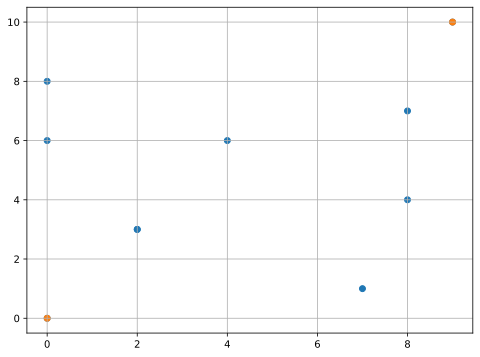

In [192]:
n = 10
points = np.array([[r.randint(0, 10), r.randint(0, 10)] for _ in range(n)])
distanse = []

for i in range(len(points)):
    point = points[i]
    point_distanse = [[abs(point[0] - next_point[0]) + abs(point[1] - next_point[1]),point, next_point] for next_point in points[i+1:]]
    distanse.append(point_distanse)

max_dist = distanse[0][0]

for el in sum(distanse, []):
    if el[0] > max_dist[0]:
        max_dist = el

print(max_dist)

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter([max_dist[1][0], max_dist[2][0]], [max_dist[1][1], max_dist[2][1]])
plt.grid(True)
plt.show()



7) Составить программу для вычисления суммы факториалов всех четных чисел от m
до n

In [193]:
def get_f(num):
    if num == 0: return 1

    f = 1
    for n in range(1, num+1): f *= n
    return f

m, n = r.randint(0, 10), r.randint(10, 11)
f_test = [get_f(num) for num in range(m, n) if num % 2 == 0]

print(f'Факториалы четных чисел от {m} до {n} {f_test}')

Факториалы четных чисел от 9 до 10 []


8) Заменить отрицательные элементы линейного массива их модулями, не пользуясь
стандартной функцией вычисления модуля. Подсчитать количество произведенных
замен.

In [194]:
array = [r.randint(-100, 10) for _ in range(20)]
print(array)
count_changes = 0
for i, el in enumerate(array):
    if el < 0:
        el = str(el)[1:]
        array[i] = int(el)
        count_changes += 1
print(array)
print(f'Количество замен = {count_changes}')

[-85, -64, -99, -87, -16, -96, -2, -56, -82, -23, -78, -35, 7, -32, -16, -21, -77, -23, -1, -8]
[85, 64, 99, 87, 16, 96, 2, 56, 82, 23, 78, 35, 7, 32, 16, 21, 77, 23, 1, 8]
Количество замен = 19


9) Дан массив А(N) (N-четное). Сформировать массив В(N), элементами которого
являются большие из двух рядом стоящих в массиве А чисел. ( Например,
А=(1,3,5,-2,0,4,0). Элементами массива В будут 3,5,5,0,4,4)

In [195]:
n = 16
A = [r.randint(-10, 10) for _ in range(n)]
B = list()
for i in range(len(A)-1):
    if A[i] > A[i+1]:
        B.append(A[i])
        continue

    B.append(A[i+1])
print(A)
print(B)

[-9, 1, 9, -5, 7, 10, 6, -10, 1, 9, -7, 8, 7, 8, 8, -5]
[1, 9, 9, 7, 10, 10, 6, 1, 9, 9, 8, 8, 8, 8, 8]


10)Дано натуральное число N. Составить программу для формирования массива,
элементами которого являются цифры числа N.

In [196]:
N = 123456789
print([int(el) for el in str(N)])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


11) Составить программу, определяющую, в каком из данных двух чисел больше цифр.

In [197]:
N = 123456789
M = 123456

M, N = str(M), str(N)
if len(N) == len(M): print('количество чисел равно')
elif len(N) > len(M): print(f'большее число {N}')
else: print(f'большее число {M}')

большее число 123456789


12)Дан массив A(N) (N— четное). Сформировать массив В(М), элементами которого
являются средние арифметические соседних пар рядом стоящих в массиве А чисел.
(Например, массив А состоит из элементов 1; 3; 5; -2; 0; 4; 0; 3. Элементами
массива В будут 2; 1,5; 2; 1,5).

In [198]:
A = [r.randint(0, 20) for _ in range(10)]
B = list()
for i in range(0, len(A), 2):
    B.append((A[i]+A[i+1])/2)

print(A)
print(B)

[17, 14, 6, 17, 2, 13, 3, 9, 14, 8]
[15.5, 11.5, 7.5, 6.0, 11.0]


 13)Даны числа a, b, c, d (длины сторон прямоугольника) и число е (диагональ
прямоугольника). Вычислить его площадь, разделив данный прямоугольник на 2
треугольника и используя формулу Герона для нахождения их площади.

Формула Герона:

##### $S = \sqrt{(p \cdot (p-a)(p-b)(p-e))}$

##### $p = \frac{a + b + e}{2}$

In [1]:
def p(a, b, e):
    return (a + b + e)/2

def S(a, b, e):
    p_ = p(a, b, e)
    return (p_ * (p_ - a) * (p_ - b) * (p_ - e))**(.5)

a, c = 10, 10
b, d = 5, 5
e = 125**(.5)

print(f'S = {2 * S(a, b, e)}')

S = 50.0


14)Даны отрезки a, b, c, d. Для каждой тройки этих отрезков, из которых можно
построить треугольник, напечатать площадь данного треугольника. Определить
функцию Plo(x, y, z), печатающую площадь треугольника со сторонами x, y, z, если
такой треугольник существует.

In [ ]:
sides = [r.randint(3, 8) for _ in range(4)]
checked = list()



15). Даны действительные числа s, t. Получить $g(1.2, s)+g(t, s)-g(2s-1, st)$, где
$g ( a,b)= \frac{(a^{2}+b^{2})} {( a^2+2ab+3b^2+4)}$


In [2]:
s = 10 
t = 5

def g(a,b):
    return (a**2 + b**2)/(a**2 + 2*a*b + 3*b**2 + 4)

print(g(1.2, s) + g(t, s) - g(2*s - 1, s*t))

0.306306604628684
